## Predicting House Prices in King County: A Comprehensive Analysis Using Multiple Linear Regression Models

## Introduction
Accurately predicting house prices is essential for buyers, sellers, and investors in the real estate market. This project focuses on predicting house prices in King County, Washington, using multiple linear regression models. We analyze various features such as living space, quality grade, and the number of bathrooms to determine their impact on house prices. By incrementally adding features to our models, we aim to identify the most significant predictors and develop a robust model for price forecasting.

## Specific Objectives

1. **Assist Real Estate Investors and Home Buyers:**
   - **Objective:** Determine the influence of square footage on house prices to guide investment and purchasing decisions.
   - **Action:** Identify how changes in square footage affect the overall price of properties.

2. **Guide Real Estate Agents:**
   - **Objective:** Understand the impact of property grade on house prices to enhance marketing strategies.
   - **Action:** Emphasize the role of property grade in influencing pricing when representing homes to potential buyers.

3. **Advise Property Developers:**
   - **Objective:** Evaluate the effect of adding bathrooms on property prices to inform development strategies.
   - **Action:** Assess how the inclusion of additional bathrooms impacts property valuation and buyer preferences.

4. **Support Real Estate Market Analysts:**
   - **Objective:** Analyze the variation in house prices across different zipcodes to refine market assessments.
   - **Action:** Examine how zipcodes affect property prices and identify which areas are associated with higher or lower values.

These objectives aim to provide a structured approach to leveraging statistical insights for better decision-making in the real estate market.

## Data Sources and Suitability
The provided data is from King County House Sales, which includes comprehensive features necessary for predicting house prices as elabolated further below in the data understanding section. The dataset contains houses constructed from  1900 to 2015 and sold between 2014 and 2015, which provides histrical data neccessary for modeliing, and evaluating the effects of different aspects of houses on prices. These properties, and completeness make it suitable for this project.

## Data Understanding
King County Housing data contains sales price of properties sold between y1 and y2 as well as various fetures for specific properties. The colums are well described below: olumn Names and descriptions for Kings County Data Set

id - unique identifier for a house
dateDate - This is the date whwn the house was sold
pricePrice - is prediction target
bedroomsNumber - This is the number of Bedrooms in the House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Importing Libraries

In this step, we import the necessary libraries for data manipulation, visualization, and model building. These include:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for machine learning model development


In [10]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Loading the Dataset

Here, we load the dataset containing house sales data from King County. This dataset includes various features related to the properties sold, which we will use for our analysis and model building.

In [11]:
#load data sets
file_path = "https://raw.githubusercontent.com/lauramwichekha/Group-5-phase-2-project/main/kc_house_data.csv"
df = pd.read_csv(file_path)

# Inspecting the Data

A quick look at the first few rows of the dataset to understand its structure and the type of data it contains. This helps in identifying any immediate issues or areas that need cleaning.

In [12]:
### finding the first 5 Inspect the data frame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
#Checking the column names 

print(f"df.columns:{df.columns}")
print(f"df.shape: {df.shape}")

df.columns:Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
df.shape: (21597, 21)


## EDA and Data cleaning
## Justification for Data Cleaning Steps

1. **Dropping Columns**: Columns such as 'floors', 'sqft_lot', 'yr_built' , 'condition', etc., were dropped due to their irrelevance in the context of our analysis. For instance, `yr_built` had a correlation of 0.05 with price - such may not significantly impact the house price prediction model. 

2. **Handling Missing Values**: The `waterfront` feature had missing values, which were imputed using the mode. This approach maintains the dataset's integrity without introducing bias from imputation.

3. **Data Type Conversion**: Converting `waterfront` to a categorical variable helps in better handling and interpretation during model training. 

4. **Removing Duplicates**: Ensuring no duplicate entries improves model accuracy by preventing overfitting to repeated data points.

In [14]:
# Columns to drop
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 
                   'yr_renovated', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074


In [15]:
house_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object

In [16]:
#EDA and Data cleaning
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")


NULL VALUES: id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64
SUMMARY STATISTICS:                  id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

  

In [17]:
print(house_df['waterfront'].dtype)
# Check unique values in the 'waterfront' column
print(house_df['waterfront'].unique())

float64
[nan  0.  1.]


#### checking the proportion of missing values in waterfront to decide if its significant to drop or not

In [20]:
# Calculate the proportion of missing values in 'waterfront'
missing_proportion = house_df['waterfront'].isnull().mean()
print(f"Proportion of missing values in 'waterfront': {missing_proportion: .2%}")


Proportion of missing values in 'waterfront':  11.00%


In [29]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]
waterfront_mode

0.0

#### Imputation of missing values with mode 

In [53]:
# Impute missing values with the mode of the 'waterfront' column
house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)

# Convert to categorical
house_df['waterfront'] = house_df['waterfront'].astype('category')


#### Checking for and handling of duplicates in the dataset
To ensure the quality of our data and prevent overfitting, we check for and remove any duplicate rows in the dataset. This step helps in improving the accuracy and generalizability of our model.

In [31]:
# Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()


Number of duplicate rows: 3


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936,98074
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001,98006
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009,98027


In [32]:
# Drop duplicate rows
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")


Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21594


#### Checking for missing values after cleaning to confirm 

In [55]:
print(f"NULL: {house_df_cleaned.isna().sum()}")
print(f"SHAPE: {house_df_cleaned.shape}")

NULL: id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64
SHAPE: (21597, 12)


## Transforming Categorical Variables and Generating Dummy Data

We transform the `zipcode` and `waterfront` features into categorical variables and then generate dummy variables (one-hot encoding) for these features. This process allows us to use these categorical variables in our regression model.


In [34]:
# ensuring that 'zipcode' and 'waterfront' are categorical
house_df_cleaned = house_df.copy()
house_df_cleaned.loc[:, 'zipcode'] = house_df_cleaned['zipcode'].astype('category')
house_df_cleaned.loc[:, 'waterfront'] = house_df_cleaned['waterfront'].astype('category')

# Generate dummy variables for 'zipcode' and 'waterfront'
house_df_dummies = pd.get_dummies(house_df_cleaned, columns=['zipcode', 'waterfront'], drop_first=True)

# Display the first few rows of the transformed DataFrame
house_df_dummies.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,...,0,0,0,0,0,0,0,0,0,0


## Correlation Matrix Analysis

We will analyze the correlation between house prices and other features in the dataset. The heatmap below visualizes these correlations, with higher values indicating stronger relationships.

### Correlation with Target Variable

The table displays how each feature correlates with the house price, helping to identify which features have the strongest impact on pricing.


Visualizations

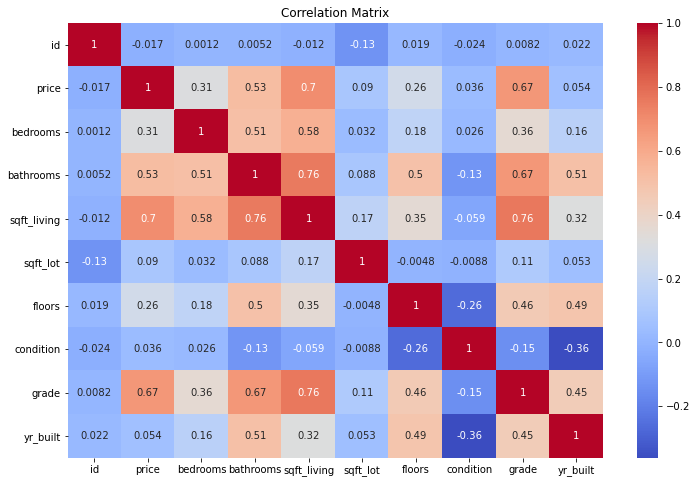

price          1.000000
sqft_living    0.701917
grade          0.667951
bathrooms      0.525906
bedrooms       0.308787
floors         0.256804
sqft_lot       0.089876
yr_built       0.053953
condition      0.036056
id            -0.016772
Name: price, dtype: float64

In [35]:
# correlation matrix BETWEEN PRICE and other features
correlation_matrix = house_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_target

## Feature Selection 

### Selected Features
We selected the following features for their relevance to house pricing:
- `price`
- `sqft_living`
- `grade`
- `bathrooms`
- `zipcode`
- `waterfront`

### Why Include Lower-Correlation Features?
- **`zipcode`**: Although its correlation with `price` is lower, it captures significant location-based price variations.
- **`waterfront`**: This feature's lower correlation does not diminish its impact, as waterfront properties often have substantial price premiums.

These features provide a balanced view of both quantitative and qualitative factors influencing house prices.


In [37]:

# Selected relevant features based on correlation and feature importance
selected_features = ['price', 'sqft_living', 'grade', 'bathrooms', 'zipcode', 'waterfront']
# Select only the relevant columns
house_df_relevant = house_df_cleaned[selected_features]
# Display the first few rows to verify
house_df_relevant.head()

,price,sqft_living,grade,bathrooms,zipcode,waterfront
0,221900.0,1180,7,1.00,98178,0.0
1,538000.0,2570,7,2.25,98125,0.0
2,180000.0,770,6,1.00,98028,0.0
3,604000.0,1960,7,3.00,98136,0.0
4,510000.0,1680,8,2.00,98074,0.0


## Feature Distribution Analysis

### Non-Categorical Variables
- **Purpose:** Visualize distributions of numeric features.
- **Features:** `price`, `sqft_living`, `grade`, `bathrooms`
- **Method:** Histograms with KDE to show the distribution and density.

### Categorical Variables
- **Purpose:** Visualize counts of categorical features.
- **Features:** `zipcode`, `waterfront`
- **Method:** Count plots to show the frequency of each category.

These plots help understand the distribution and frequency of both numeric and categorical variables in the dataset.


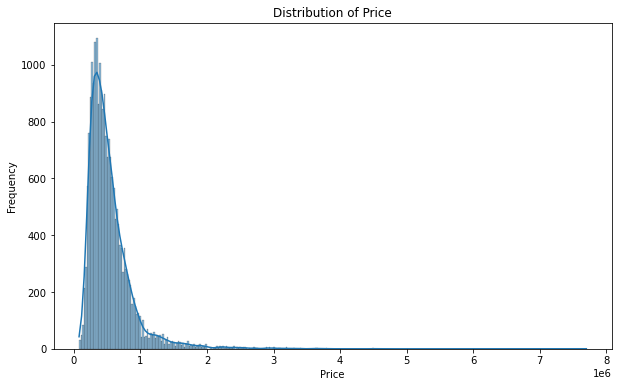

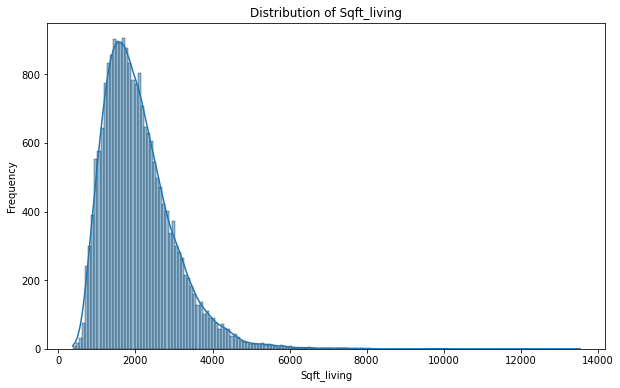

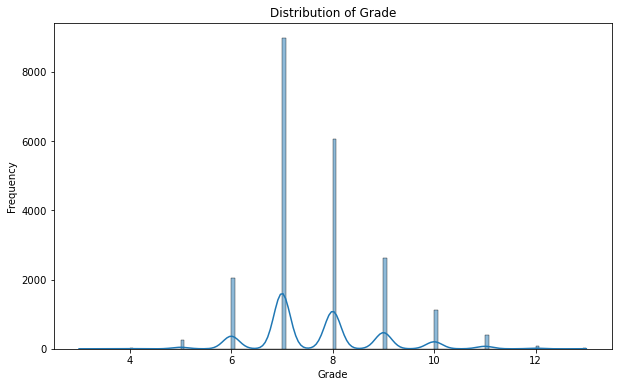

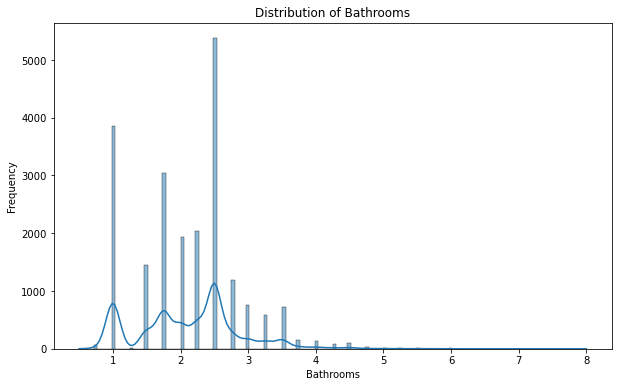

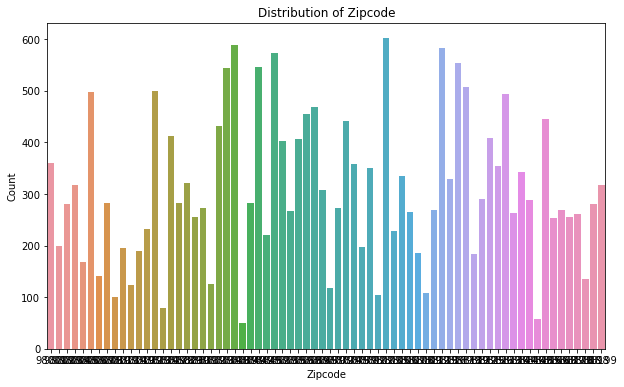

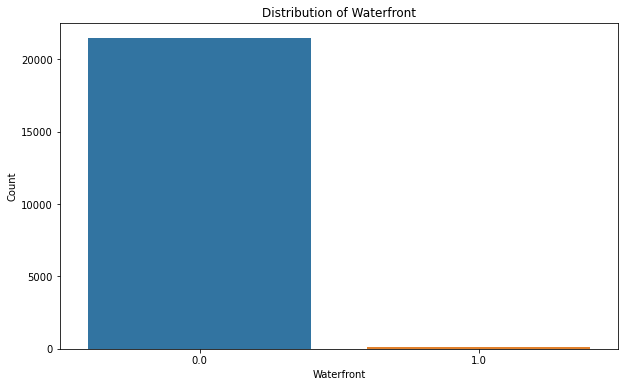

In [38]:
# Separate categorical and non-categorical variables
categorical_features = ['zipcode', 'waterfront']
numeric_features= ['price', 'sqft_living', 'grade', 'bathrooms']

# Plot distributions for non-categorical variables
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=house_df_relevant[feature])
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()


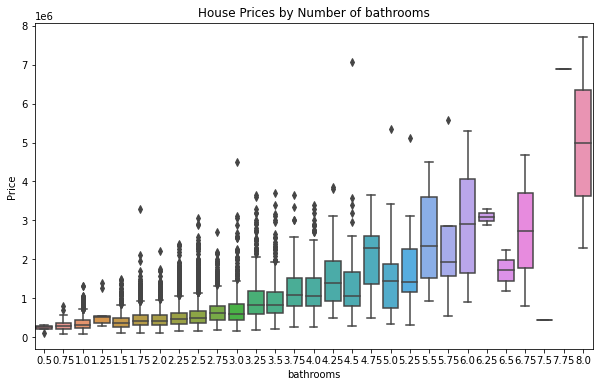

In [39]:
# Box plot of prices by number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=house_df_relevant)
plt.title('House Prices by Number of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

## Pair Plot of Continuous Features

- **Purpose:** Visualize relationships and distributions between continuous features.
- **Features:** `price`, `sqft_living`, `grade`, `bathrooms`
- **Method:** Pair plot to show scatterplots and distributions of these features.

This plot provides insights into how these continuous variables relate to each other.


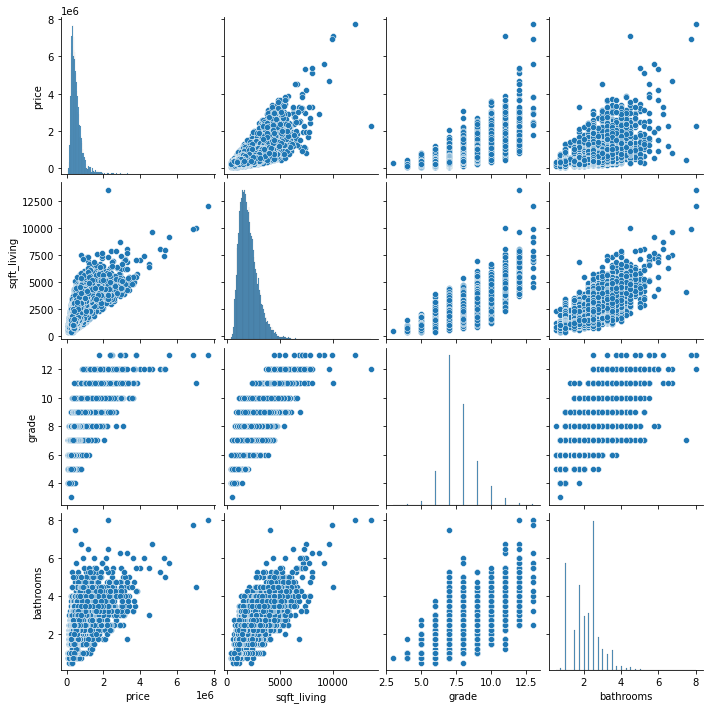

In [40]:
# Pair plot for continuous features
sns.pairplot(house_df_relevant[numeric_features])
plt.show()

## Skewness of Continuous Features

- **Purpose:** Assess the distribution symmetry of continuous features.
- **Features:** `price`, `sqft_living`, `grade`, `bathrooms`
- **Output:** Displays skewness values for each feature.

High skewness values may indicate the need for data transformation to normalize distributions.


In [42]:
# Check skewness of all continuous features
skewness = house_df_relevant.skew()
skewness

price          4.023365
sqft_living    1.473215
grade          0.788237
bathrooms      0.519709
dtype: float64

### Outlier Removal

Outliers can significantly skew the results of data analysis and modeling. Therefore, it is important to identify and remove them to improve the quality of the dataset. In this step, we will use the Interquartile Range (IQR) method to detect and remove outliers from the continuous predictor variables.

The IQR method works as follows:
1. **Calculate the First (Q1) and Third (Q3) Quartiles:** These quartiles represent the 25th and 75th percentiles of the data, respectively.
2. **Compute the IQR:** The IQR is the difference between Q3 and Q1.
3. **Determine the Lower and Upper Boundaries:** Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
4. **Filter Out Outliers:** Remove data points that fall outside the calculated boundaries.

We will apply this method to the continuous predictor features (`sqft_living`, `grade`, `bathrooms`), excluding the target variable (`price`).

Below is the code to perform outlier removal:


In [56]:
scaled_features = ['price' , 'sqft_living', 'grade', 'bathrooms']  # Exclude 'price' # Function to identify and remove outliers using IQR
# Calculate IQR and remove outliers for each feature
for column in numeric_features:
    Q1 = house_df_relevant[column].quantile(0.25)
    Q3 = house_df_relevant[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    house_df_relevant = house_df_relevant[(house_df_relevant[column] >= lower_bound) & (house_df_relevant[column] <= upper_bound)]

# Display the shape of the DataFrame before and after removing outliers
print("Original shape:", house_df_relevant.shape)
print("Shape after removing outliers:", house_df_relevant.shape)


Original shape: (18666, 7)
Shape after removing outliers: (18666, 7)


### Feature Scaling

Feature scaling is an important step in data preprocessing, especially for algorithms that are sensitive to the scale of the data, such as linear regression, support vector machines, and neural networks. In this step, we will apply feature scaling to the continuous predictor variables to standardize their range.

We will use the `StandardScaler` from `sklearn.preprocessing` to standardize our features by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the model and prevents features with larger scales from dominating.

**Steps:**
1. **Initialize the Scaler:** We will use the `StandardScaler` for standardization.
2. **Fit and Transform the Data:** We will apply the scaler to the continuous predictor features (`sqft_living`, `grade`, `bathrooms`), excluding the target variable (`price`).

Below is the code to perform feature scaling:



In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scaler (StandardScaler)
scaler = StandardScaler()  # Use StandardScaler for normalization

# Fit and transform the predictor data, excluding 'price'
house_df_relevant[scaled_features] = scaler.fit_transform(house_df_relevant[scaled_features])

# Display the first few rows to verify scaling
print(house_df_relevant.head())


      price  sqft_living     grade  bathrooms zipcode waterfront  log_price
0 -1.275479    -1.077628 -0.502647  -1.523581   98178        0.0        NaN
1  0.488226     1.078057 -0.502647   0.397413   98125        0.0  -0.912470
2 -1.509263    -1.713478 -1.721775  -1.523581   98028        0.0        NaN
3  0.856478     0.132037 -0.502647   1.550010   98136        0.0  -0.294698
4  0.331997    -0.302202  0.716481   0.013214   98074        0.0  -1.362887


## Log-Transformation of Price

- **Purpose:** Create a log-transformed version of the `price` to stabilize variance and normalize the distribution.
- **New Column:** `log_price`
- **Action:** Adds `log_price` to the dataframe with the log-transformed values of `price`.

In [46]:
import numpy as np

# Add a new column 'log_price' with the log-transformed price
house_df_relevant['log_price'] = np.log(house_df_relevant['price'])
print(house_df_relevant.head())

      price  sqft_living     grade  bathrooms zipcode waterfront  log_price
0 -1.242308    -1.079230 -0.521977  -1.523195   98178        0.0        NaN
1  0.401531     1.006482 -0.521977   0.364327   98125        0.0  -0.912470
2 -1.460204    -1.694440 -1.725021  -1.523195   98028        0.0        NaN
3  0.744756     0.091169 -0.521977   1.496840   98136        0.0  -0.294698
4  0.255921    -0.328974  0.681067  -0.013178   98074        0.0  -1.362887


c:\Users\GeorgeC\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Visualization and Normality Checks for Scaled Features

After scaling the continuous predictor variables, it is important to check their normality. This step helps to validate the assumptions of various statistical models that assume normal distribution of the input features.

We will use the following methods to check for normality:
1. **Histogram and KDE plot:** Visualize the distribution of the data to see if it approximates a bell curve.
2. **Q-Q plot (Quantile-Quantile plot):** Compare the quantiles of the feature's distribution with the quantiles of a normal distribution

Below is the code to visualize the scaled features:


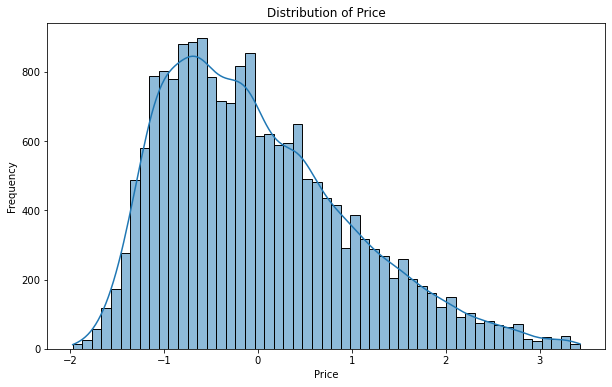

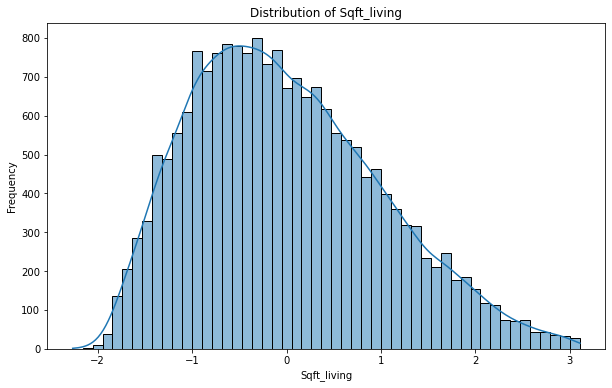

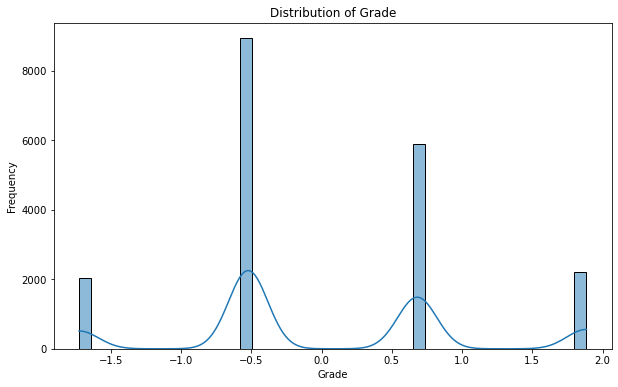

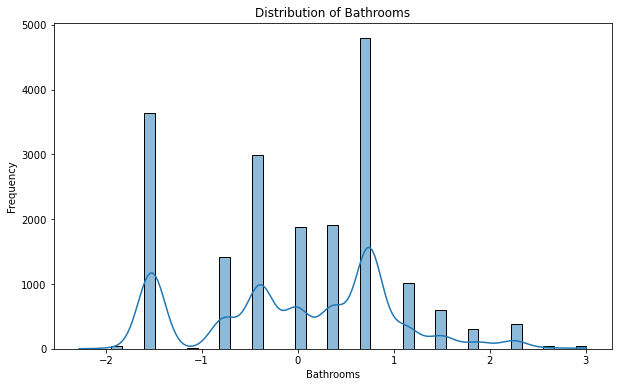

In [47]:

# Visualize the scaled features after addressing skewness and all cleaning
 
for feature in scaled_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

### Q-Q Plots

Quantile-Quantile (Q-Q) plots are used to determine if a dataset follows a specified distribution, such as the normal distribution. In this step, we will create a Q-Q plot for the `sqft_living` feature  `bathrooms`  and `grade`to check for normality. 

The Q-Q plot compares the quantiles of the  features' distribution with the quantiles of a normal distribution. If the data points approximately lie on a straight line, it suggests that the data is normally distributed.

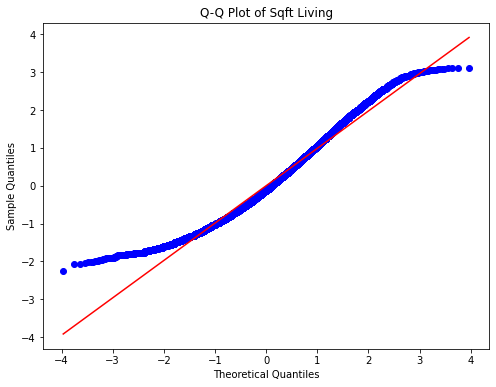

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for sqft_living
plt.figure(figsize=(8, 6))
stats.probplot(house_df_relevant['sqft_living'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sqft Living')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()



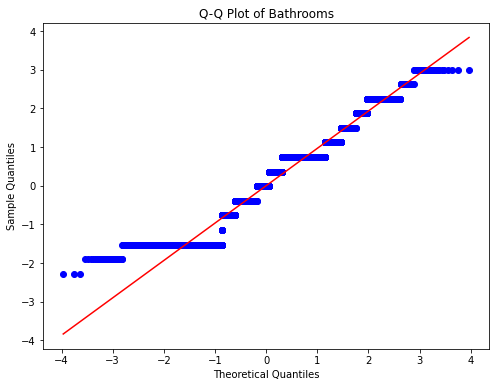

In [49]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for bathrooms
plt.figure(figsize=(8, 6))
stats.probplot(house_df_relevant['bathrooms'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Bathrooms')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


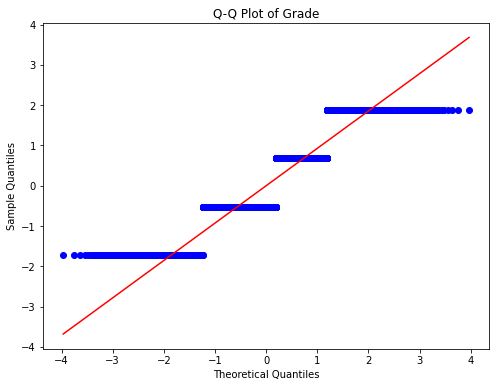

In [50]:
# Q-Q plot for grade
plt.figure(figsize=(8, 6))
stats.probplot(house_df_relevant['grade'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Grade')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [58]:
 house_df_relevant.isna().sum()


price              0
sqft_living        0
grade              0
bathrooms          0
zipcode            0
waterfront         0
log_price      10882
dtype: int64

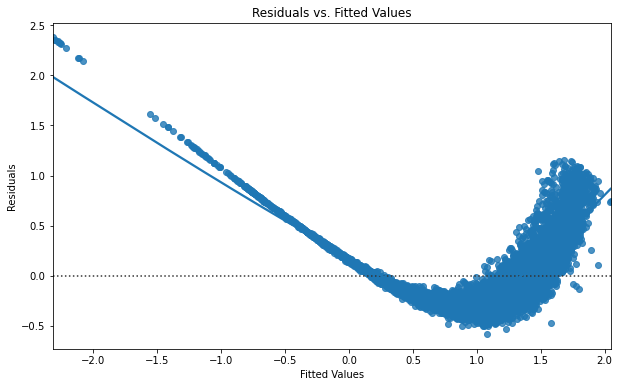

In [59]:
# Residuals vs. fitted values plot
# Drop rows with missing values in relevant columns
house_df_relevant = house_df_relevant.dropna()

import statsmodels.api as sm 
X = house_df_relevant.drop(columns=['price'])
y = house_df_relevant['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


## Model Training: Initial Model 1

We start by training an initial linear regression model using `sqft_living` as the only predictor. This helps us understand the baseline performance of the model with a single feature.

check heteroscedasticity

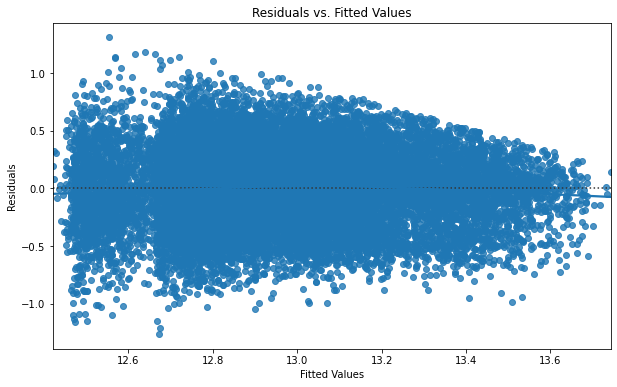

In [25]:
# Residuals vs. fitted values plot

import statsmodels.api as sm 
X = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


## Modelling

MODEL 1: Simple regression with sqft_living and price 

In [29]:
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Features and target variable
X1 = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']

X1 = house_df_relevant_no_outliers[['sqft_living']]
y = house_df_relevant_no_outliers['price']
#split data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#train the model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

#make predictions with the model
y_pred1 = model1.predict(X1_test)

# Evaluate the model
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - Simple Regression with One Feature (sqft_living): \n MAE: {mae1}, \n R_squared: {r2_1}")

Model 1 - Simple Regression with One Feature (sqft_living): 
 MAE: 0.29121257329528977, 
 R_squared: 0.30526079010772833


MODEL 2: Sqft_living, grade and price 

In [30]:
# Features and target variable
X2 = house_df_relevant_no_outliers[['sqft_living', 'grade']]
y = house_df_relevant_no_outliers['price']

#split data
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state = 42)

#Train model2
model2=LinearRegression()
model2.fit(X2_train, y_train)

#prediction 
y_pred2 = model2.predict(X2_test)

#eVALUATE 
mae2 = r2_score(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 - regression with two features (sqft_living and grade): \n MAE : {mae2} \n R_squared: {r2_2}")

Model 2 - regression with two features (sqft_living and grade): 
 MAE : 0.37259196552001583 
 R_squared: 0.37259196552001583


MODEL 3: Regression with Three Features (sqft_living, grade, bathrooms)

In [31]:

# Define X and y for Model 3
X3 = house_df_relevant_no_outliers[['sqft_living', 'grade', 'bathrooms']]
y = house_df_relevant_no_outliers['price']

# Split the data for Model 3
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Train the model for Model 3
model3 = LinearRegression()
model3.fit(X3_train, y_train)

# Make predictions for Model 3
y_pred3 = model3.predict(X3_test)

# Evaluate the model for Model 3
mae3 = mean_absolute_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 - Regression with Three Features (sqft_living, grade, bathrooms): \n MAE: {mae3}, \n  R_squared: {r2_3}")

Model 3 - Regression with Three Features (sqft_living, grade, bathrooms): 
 MAE: 0.2739612837663382, 
  R_squared: 0.3742796587812194


MODEL 4: regression with all the selected features 

In [32]:
# Define X and y for Model 4
X4 = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']

# Split the data for Model 4
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Train the model for Model 4
model4 = LinearRegression()
model4.fit(X4_train, y_train)

# Make predictions for Model 4
y_pred4 = model4.predict(X4_test)

# Evaluate the model for Model 4
mae4 = mean_absolute_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
print(f"Model 4 - Comprehensive Regression with All Features: \n MAE: {mae4}, \n R_squared: {r2_4}")

# Feature coefficients for Model 4
coefficients = pd.DataFrame({'Feature': X4_train.columns,   
                             'Coefficient': model4.coef_})

print(coefficients)

Model 4 - Comprehensive Regression with All Features: 
 MAE: 0.27312296015464727, 
 R_squared: 0.37694757820509783
       Feature  Coefficient
0  sqft_living     0.000243
1        grade     0.179283
2    bathrooms    -0.017369
3     bedrooms    -0.036238
4       floors    -0.014540


In [33]:
# Create a DataFrame with actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred4
})

comparison_df.head(10)

,Actual Price,Predicted Price
9249,13.384729,13.342286
15718,12.611541,13.138715
18928,13.270785,12.881007
13512,13.122365,12.908413
17964,13.329379,12.931863
14116,12.810391,12.595544
389,12.861001,12.895258
10895,13.385498,13.143064
13272,13.304687,12.888293
14742,11.982935,12.795482


## Discussion of the Results


The analysis of house prices using multiple linear regression models demonstrated that adding more features incrementally improves predictive accuracy and explanatory power. Model 1, with only sqft_living, explained 30.53% of the variance in house prices, indicating a moderate relationship between living area size and prices.

Model 2 included grade, increasing the R-squared to 37.26%, showing that house quality is also significant. However, the MAE increased slightly, suggesting potential overfitting. Model 3, which added bathrooms, improved the MAE to 0.2740 and the R-squared to 37.43%, confirming the relevance of the number of bathrooms.

Model 4, incorporating all features, had the best performance with an MAE of 0.2731 and an R-squared of 37.69%. This comprehensive model highlighted that multiple features together provide a better understanding of house price determinants. Key coefficients showed grade (0.1793) had the most substantial positive impacts on prices.



## Conclusions 
Best Predictive Model: Model 4, using all features, is the most accurate and robust for predicting house prices. It balances prediction accuracy and explanatory power effectively.

Key Influencing Features: Grade is the most influential features positively affecting house prices. Enhancing property quality and optimizing living space can significantly increase property values.


## Key Recommendations
1. Enhance Property Quality: Invest in improving the overall quality (grade) of properties. High-quality materials and design standards lead to substantial returns.

2. Optimize Living Space: Increase living space (sqft_living) thoughtfully, ensuring additional space enhances functionality and appeal without unnecessary expansions.

3. Balanced Feature Development: Aim for a balanced approach in adding features like floors, bathrooms, and bedrooms. Focus on usability, aesthetics, and overall appeal to avoid potential negative impacts on house prices.

Implementing these recommendations helps stakeholders understand the factors influencing house prices and make informed decisions to enhance property value effectively.